In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans , k_means
import warnings
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

# DATA ANALYSIS

In [31]:
main_data = pd.read_csv("/kaggle/input/final-orders/final_orders.csv")
df = main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,time_spend
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,40
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,40
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,40
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,21
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables,37
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water,22
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce,40
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce,29


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  time_spend              int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 200.3+ MB


In [33]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
time_spend                     0
dtype: int64

In [34]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [35]:
unique_order_numbers = df['order_id'].unique()
num_unique_order_numbers = len(unique_order_numbers)
print("Number of unique numbers:", num_unique_order_numbers)

Number of unique numbers: 200000


In [36]:
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col].fillna(-1,inplace=True)

In [37]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
time_spend                0
dtype: int64

In [38]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
 12  time_spend              int64 
dtypes: int64(11), object(2)
memory usage: 200.3+ MB


**Data preperation**

In [40]:
# INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURE
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

In [41]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name',
       'time_spend'],
      dtype='object')

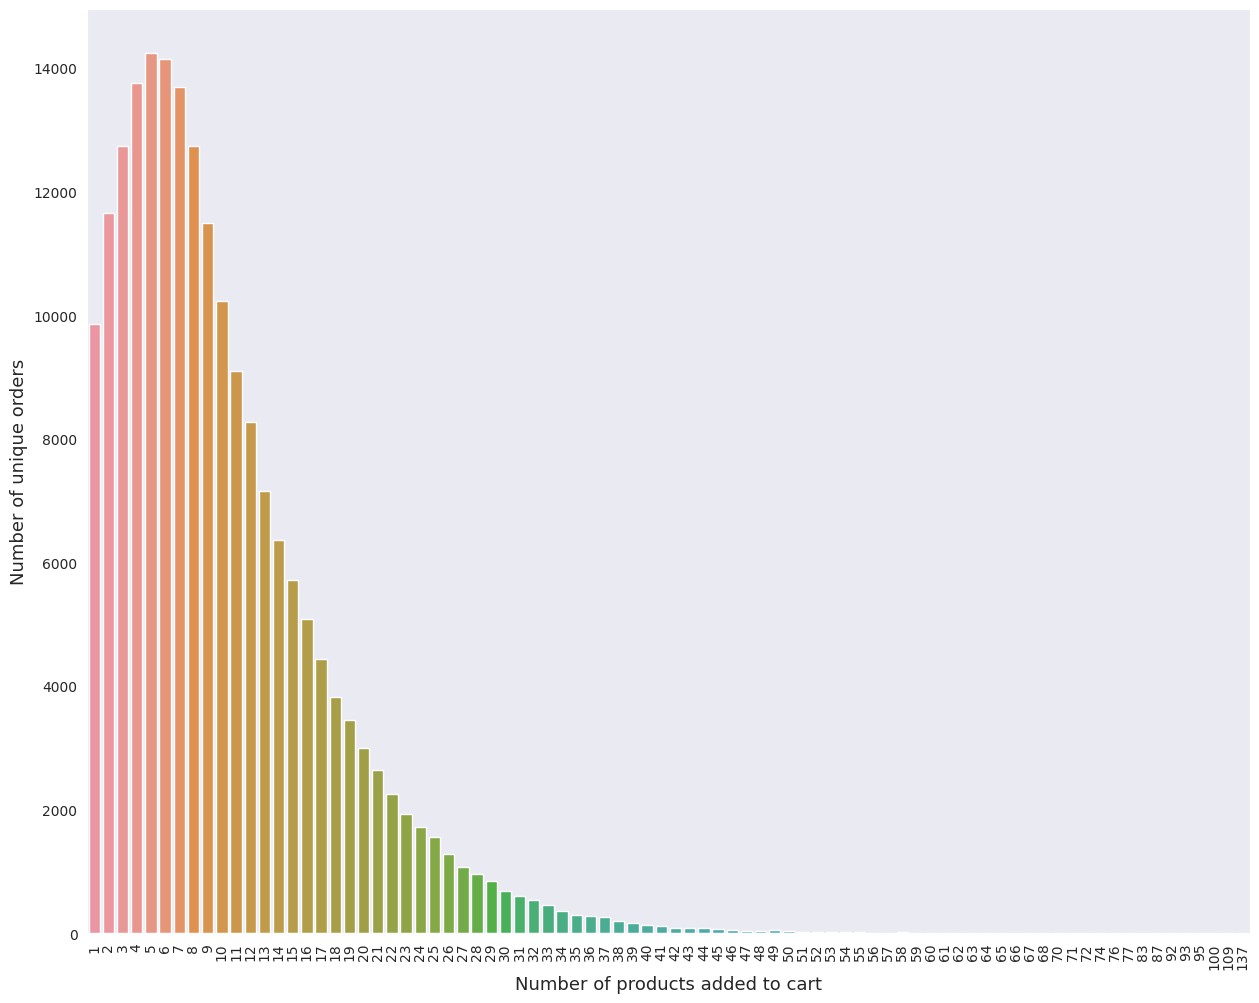

In [42]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()

In [43]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
grouped

,index,product_id,product_name,department,reordered
0,23,24,fresh fruits,produce,226039
1,82,83,fresh vegetables,produce,212611
2,122,123,packaged vegetables fruits,produce,109596
3,119,120,yogurt,dairy eggs,90751
4,20,21,packaged cheese,dairy eggs,61502
5,83,84,milk,dairy eggs,55150
6,114,115,water seltzer sparkling water,beverages,52564
7,106,107,chips pretzels,snacks,45306
8,90,91,soy lactosefree,dairy eggs,39389
9,111,112,bread,bakery,36381


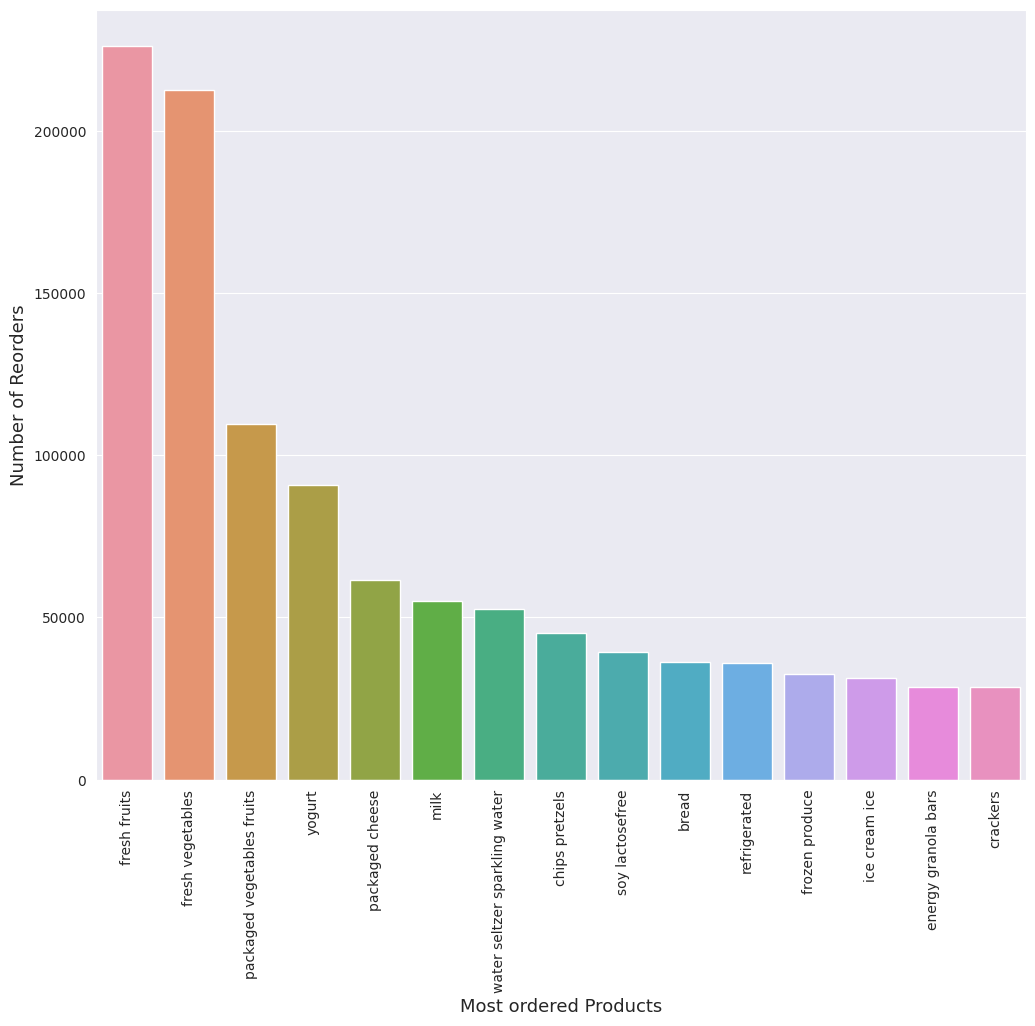

In [44]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE & IDENTIFY THE MOST REORDERED ITEMS
grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

In [45]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


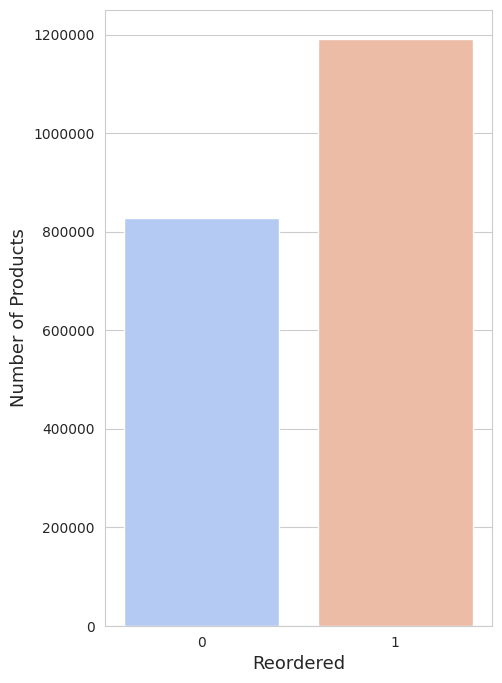

In [46]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE REORDERED RATIO
grouped  = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# K-MEANS

In [47]:
### UNDERSTANDING DATA DISTRIBUTION BY USING CROSSTAB TO GET ROW WISE PROPORTION FOR EARCH DEPARTMENT
clst_prd = pd.crosstab(df['user_id'], df['department'])

# With time spend
# Group by both 'user_id' and 'department' and calculate the sum of 'time_spend'
# total_time_spend_by_aisle = df.groupby(['user_id', 'department'])['time_spend'].sum()

# Unstack the resulting Series to pivot the department index into columns
# total_time_spend_by_aisle = total_time_spend_by_aisle.unstack()

# Concatenate the total time spent by aisle with the department crosstab
# clst_prd = pd.concat([clst_prd, total_time_spend_by_aisle], axis=1)

clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [48]:
X_train = clst_prd.values

imputer = SimpleImputer(strategy='mean')
# Fit the imputer to X_train and transform X_train
X_train = imputer.fit_transform(X_train)

# RUNNNG K-MEANS ON 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# PREDICTIONS FOR NEW DATA
predictions = kmeans.predict(X_train)

# CALCULATING THE COUNTS FOR THE CLUSTER
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# CREATING THE PLOT
countscldf = pd.DataFrame(counts, columns=["Cluster 1 ", "Cluster 2" , "Cluster 3", "Cluster 4", "Cluster 5"])

# DISPLAY THE PLOT
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,62784,5843,8038,1926,26682


# CLUSTER ANALYSIS

In [49]:
# ACCESSING THE CLUSTER CENTROIDS
centroids = kmeans.cluster_centers_

# CREATING DATAFRAME FOR CENTROIDS
centroids_df = pd.DataFrame(centroids, columns=clst_prd.columns)  
print(centroids_df)

department   alcohol    babies    bakery  beverages  breakfast      bulk  \
0           0.108735  0.102970  0.367211   1.079274   0.243347  0.007389   
1           0.151312  0.756219  2.036885   6.021616   1.584491  0.038085   
2           0.033470  0.626726  1.467836   2.430260   0.748911  0.063208   
3           0.055065  1.771429  3.447273   5.497662   1.930909  0.131948   
4           0.050736  0.248023  0.735114   1.316671   0.387904  0.025668   

department  canned goods  dairy eggs      deli  dry goods pasta  ...  \
0               0.288303    1.453380  0.303177         0.247456  ...   
1               1.347572   10.804598  1.680220         1.284097  ...   
2               1.625855    7.265273  1.441085         1.220605  ...   
3               3.176104   17.602078  3.286234         2.603636  ...   
4               0.783640    3.387230  0.690823         0.607337  ...   

department  household  international  meat seafood   missing     other  \
0            0.352862       0.076121

In [50]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# STATISTICS ABOUT CLUSTERS
cluster_labels = kmeans.labels_

data_with_labels = pd.concat([clst_prd, pd.Series(cluster_labels, name='Cluster')], axis=1)

cluster_groups = data_with_labels.groupby('Cluster')

cluster_statistics = cluster_groups.describe()

print(cluster_statistics)

pd.reset_option('display.max_rows')  # Reset maximum rows option to default
pd.reset_option('display.max_columns')  # Reset maximum columns option to default

         alcohol                                                 babies  \
           count      mean       std  min  25%  50%  75%   max    count   
Cluster                                                                   
0.0      31981.0  0.089960  0.708833  0.0  0.0  0.0  0.0  34.0  31981.0   
1.0       3105.0  0.101127  0.765359  0.0  0.0  0.0  0.0  19.0   3105.0   
2.0       4022.0  0.084038  0.674913  0.0  0.0  0.0  0.0  25.0   4022.0   
3.0        938.0  0.041578  0.380106  0.0  0.0  0.0  0.0   9.0    938.0   
4.0      13626.0  0.094672  0.706243  0.0  0.0  0.0  0.0  18.0  13626.0   

                                                        bakery            \
             mean       std  min  25%  50%  75%   max    count      mean   
Cluster                                                                    
0.0      0.249554  1.435319  0.0  0.0  0.0  0.0  43.0  31981.0  0.701885   
1.0      0.260225  1.395609  0.0  0.0  0.0  0.0  29.0   3105.0  0.705958   
2.0      0.302834  

# PRINCIPLE COMPONENT ANALYSIS

Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 640x480 with 0 Axes>

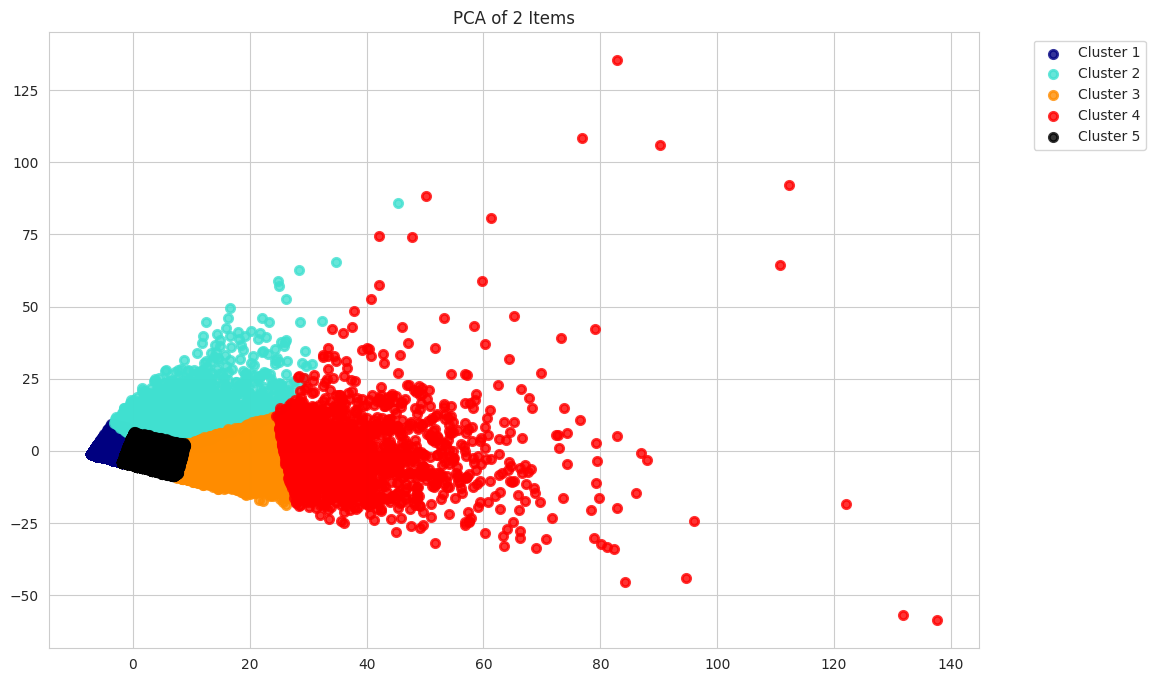

In [51]:
# RUNNING PCA TO VISUALIZE DATA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 1","Cluster 2", "Cluster 3","Cluster 4", "Cluster 5"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [52]:
## FINAL STEP:

# RUNNING PCA WITH 9 COMPONENTS
pca = PCA(n_components=9, random_state=453)
X_r = pca.fit(X).transform(X)

# RUNNING K-MEANS WITH 5 CLUSTERS
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans= kmeans.fit(X_r)

clusters = kmeans.labels_

# ADDING THE CLUSTERS BACK TO THE ORIGINAL DATASET
clst_prd['clusters'] = clusters

# CREATING A CLUSTER CATERGORY
clst_prd["Cluster Category"] = "No Data"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==0]="Cluster 1"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==1]="Cluster 2"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==2]="Cluster 3"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==3]="Cluster 4"
clst_prd["Cluster Category"].loc[clst_prd["clusters"]==4]="Cluster 5"

clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,clusters,Cluster Category
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,3,3,0,Cluster 1
3,0,0,0,1,0,0,0,5,0,0,...,0,0,0,1,0,0,6,3,3,Cluster 4
7,0,0,1,7,0,0,2,4,3,0,...,1,0,0,0,0,0,2,3,0,Cluster 1
10,0,0,0,0,0,0,0,5,4,0,...,4,0,0,4,0,0,13,0,3,Cluster 4
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,4,0,0,2,0,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,1,0,0,0,0,1,4,0,3,Cluster 4
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,3,0,0,Cluster 1
206206,0,0,0,2,0,0,0,1,1,0,...,1,0,0,0,0,0,1,4,0,Cluster 1


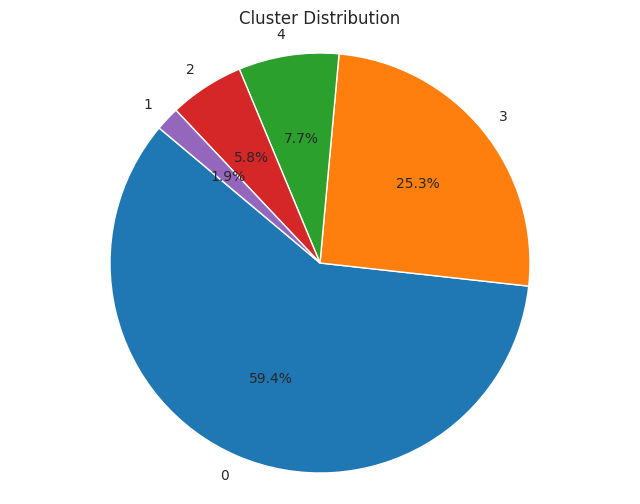

In [53]:
import matplotlib.pyplot as plt

# Calculate the counts of customers in each cluster
cluster_counts = clst_prd['clusters'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

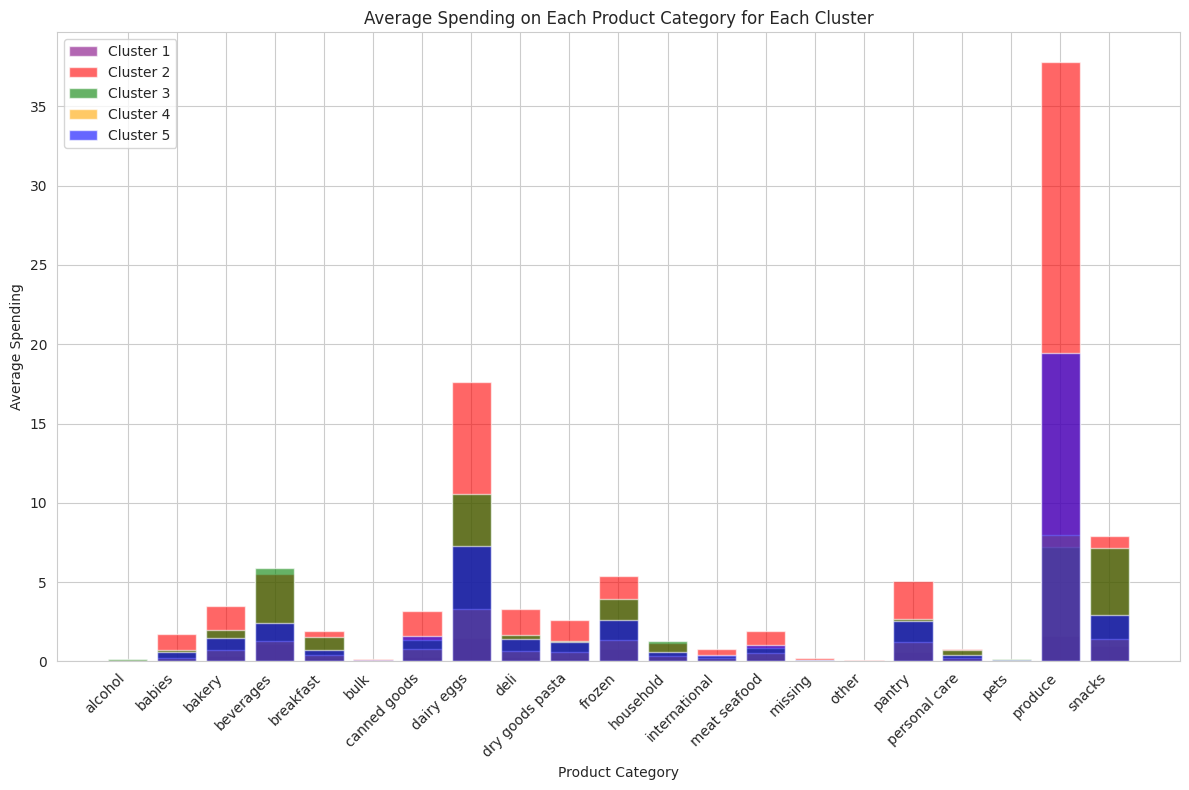

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate average spending for each product category within each cluster
average_spending_per_cluster = clst_prd.groupby('Cluster Category').mean()

# Drop unnecessary columns
average_spending_per_cluster.drop(['clusters'], axis=1, inplace=True)

# Transpose the dataframe for easier plotting
average_spending_per_cluster = average_spending_per_cluster.T

# Plotting
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['purple', 'red', 'green', 'orange', 'blue']

# Plot bars for each cluster
for i, cluster_label in enumerate(average_spending_per_cluster.columns):
    plt.bar(average_spending_per_cluster.index, average_spending_per_cluster[cluster_label],
            color=colors[i], alpha=0.6, label=cluster_label)

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.title('Average Spending on Each Product Category for Each Cluster')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


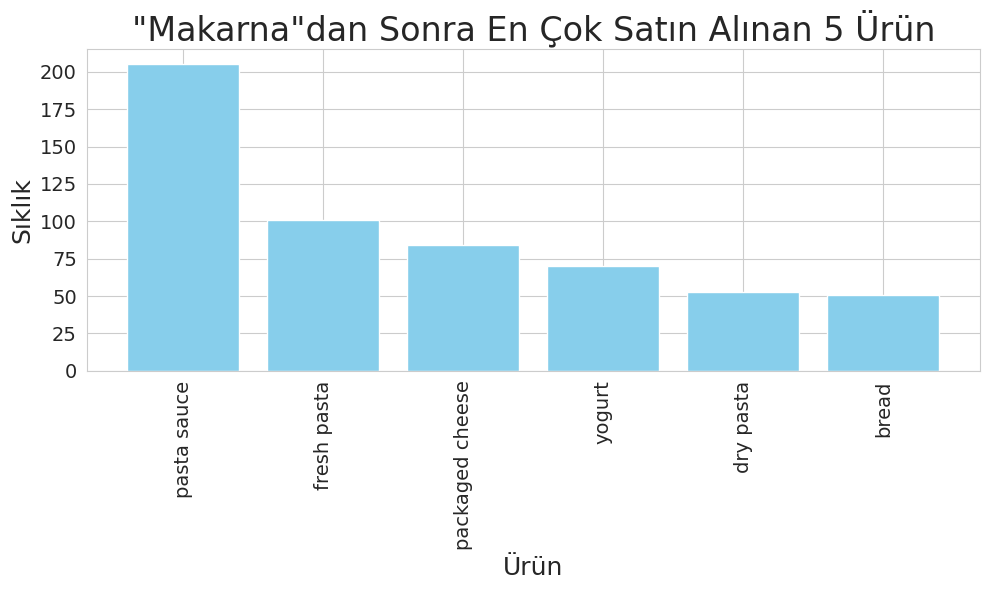

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to only include rows where "fresh pasta" is purchased
fresh_pasta_orders = df[df['product_name'] == 'fresh pasta']

# Initialize a dictionary to store counts of products purchased after "fresh pasta"
next_items_count = {}

# Iterate over each row in the filtered dataset
for index, row in fresh_pasta_orders.iterrows():
    next_item = df.loc[index + 1, 'product_name']  # Get the product purchased after "fresh pasta"
    if next_item in next_items_count:
        next_items_count[next_item] += 1
    else:
        next_items_count[next_item] = 1

# Convert the dictionary to a DataFrame
next_items_df = pd.DataFrame(list(next_items_count.items()), columns=['Product', 'Frequency'])

# Sort the DataFrame by frequency in descending order
next_items_df = next_items_df.sort_values(by='Frequency', ascending=False)

# Select only the top 5 items
top_5_items_df = next_items_df.head(9)

# Manually remove "fresh vegetables" and "fresh fruits" if they exist in the top 5 items
top_5_items_df = top_5_items_df[~top_5_items_df['Product'].isin(['fresh vegetables', 'fresh fruits', 'packaged vegetables fruits'])]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_5_items_df['Product'], top_5_items_df['Frequency'], color='skyblue')
plt.xlabel('Ürün', fontsize=18) 
plt.ylabel('Sıklık', fontsize=18)  
plt.title('"Makarna"dan Sonra En Çok Satın Alınan 5 Ürün', fontsize=24)  
plt.xticks(rotation=90, fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.show()
